 Sales Prediction Usin Linear Regression

In [1]:
import numpy as np
import pandas as pd
!pip install kagglehub
import kagglehub

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading the dataset

In [5]:
advertising= pd.read_csv('/kaggle/input/advertising/advertising.csv')

In [6]:
#Inspecting the dataset

In [7]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
advertising.shape

(200, 4)

In [9]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

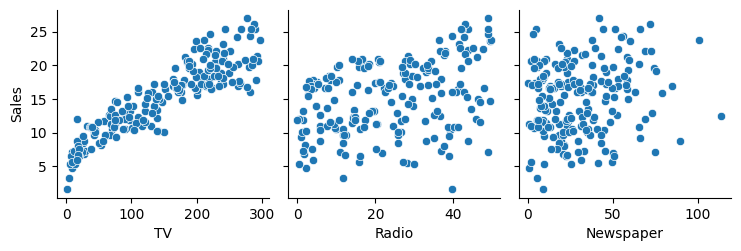

In [11]:
sns.pairplot(data=advertising, x_vars=["TV","Radio","Newspaper"], y_vars="Sales")
plt.show()

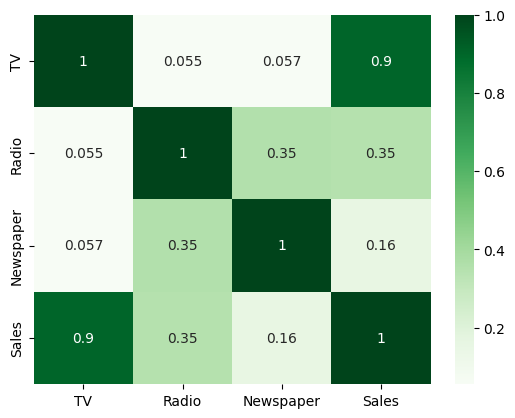

In [12]:
sns.heatmap(advertising.corr(),cmap="Greens", annot=True)
plt.show()

In [13]:
X=advertising["TV"]
y=advertising["Sales"]

In [14]:
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [15]:
#Importing statsmodel

In [16]:
import statsmodels
import statsmodels.api as sm

In [17]:
#importing sklearn- sklearn is also known as sci kit learn

In [18]:
import sklearn
from sklearn.model_selection import train_test_split

In [19]:
#dividing the data into training and test data

In [20]:
X_train,X_test,y_train,y_test =train_test_split(X,y, train_size=0.7, random_state=100 )

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [22]:
X_train_sm = sm.add_constant(X_train)

In [23]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [24]:
#OLS means Ordinary Least Square
lr = sm.OLS(y_train,X_train_sm).fit()

In [25]:
lr.params #parameters

const    6.948683
TV       0.054546
dtype: float64

In [26]:
#y = mx+c
#y= 0.054546 X +6.948683

In [27]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           1.52e-52
Time:                        15:48:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[]

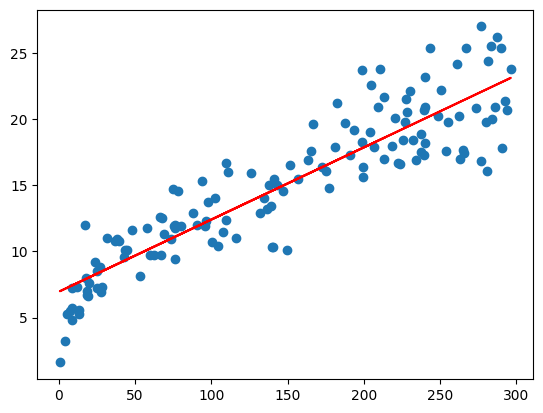

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,0.054546*X_train+6.948683,"r")
plt.plot()

In [29]:
# we know that error= original value- predicticted value
# in this case= y_train-y_predicted
#to find the value of y_predicted

In [30]:
y_predicted =lr.predict(X_train_sm)

In [31]:
res= (y_train-y_predicted)

In [32]:
#we know that the error terms should be normally distributed

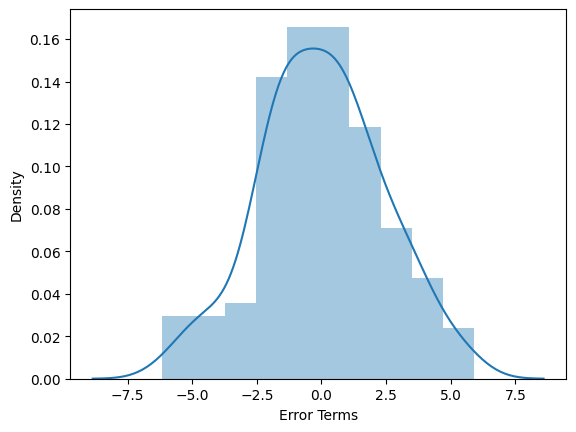

In [33]:
sns.distplot(res, bins=10)
plt.xlabel("Error Terms")
plt.show()

In [34]:
#the error terms are normally distributed

In [35]:
#the accuracy on training data is coming around 81% now let's perform it on test data

In [36]:
X_test_sm=sm.add_constant(X_test)

In [37]:
y_test_pred = lr.predict(X_test_sm)

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

2.019296008966233

In [40]:
r2_score(y_test,y_test_pred)

0.7921031601245658